# Upper Confidence Bound (UCB)

## Importing the libraries

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

## Importing the dataset

In [28]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [29]:
N = 1000                                                    #total no. of users / total number of rounds
d = 10                                                      #total no. of advertisements
ads_selected = []                                           #Full list of ads selected over the rounds 
number_of_selections = [0] * d                              # => Ni
sums_of_rewards = [0] * d                                   # => Ri
total_reward = 0

for n in range(0, N):
  ad = 0
  max_upper_bound = 0
  for i in range(0, d):
    if (number_of_selections[i] > 0):
      average_reward = sums_of_rewards[i] / number_of_selections[i]
      delta_i = math.sqrt(3/2 * math.log(n + 1) / number_of_selections[i])
      upper_bound = average_reward + delta_i
    else:
      upper_bound = 1e400
    if (upper_bound > max_upper_bound):
      max_upper_bound = upper_bound
      ad = i
  ads_selected.append(ad)
  number_of_selections[ad] += 1 
  reward = dataset.values[n, ad]
  sums_of_rewards[ad] = sums_of_rewards[ad] + reward 
  total_reward = total_reward + reward

## Visualising the results

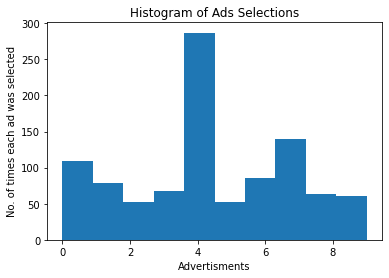

In [30]:
plt.hist(ads_selected)
plt.title('Histogram of Ads Selections')
plt.xlabel('Advertisments')
plt.ylabel('No. of times each ad was selected')
plt.show()